In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fsps

%matplotlib inline

## Part (a) 

Following the one example provided on the python-fsps website, this is my attempt to get a no dust, fixed metallicity etc model.

In [2]:
sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=0, zmet=5, dust_type=0, sf_start=13.69)
wave, spec = sp.get_spectrum(tage=13.7)

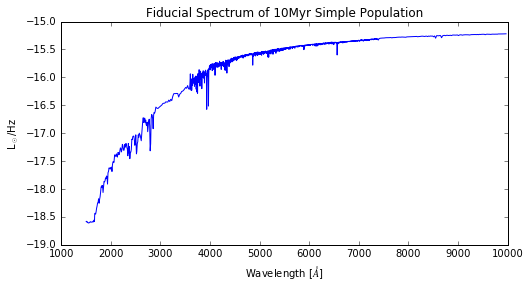

In [3]:
i = np.where(1500 <= wave)[0][0]
ii = np.where (wave <= 10000)[0][-1]

fig = plt.figure(figsize=(8,4))
plt.plot(wave[i:ii], np.log10(spec[i:ii]))
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(r'L$_\odot$/Hz')
plt.title('Fiducial Spectrum of 10Myr Simple Population')
plt.show()

Now we change the index of the high-mass IMF (holding the lower portions fixed) and plot the resulting spectrum.

In [4]:
wave_all = []
spec_all = []
index_vals = [0.8, 1.3, 1.8]
for alpha in index_vals:
    sp.params['imf3'] = alpha
    # get new spectrum
    wave, spec = sp.get_spectrum(tage=13.7)
    # save this for later plotting
    wave_all.append(wave)
    spec_all.append(spec)

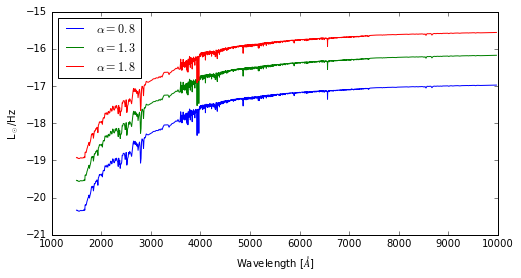

In [5]:
i = np.where(1500 <= wave_all[0])[0][0]
ii = np.where (wave_all[0] <= 10000)[0][-1]
fig = plt.figure(figsize=(8,4))
for j in range(3):
    plt.plot(wave_all[j][i:ii], np.log10(spec_all[j][i:ii]), label=r'$\alpha=%s$'%index_vals[j])
    plt.legend(loc=2)
    plt.xlabel(r'Wavelength [$\AA$]')
    plt.ylabel(r'L$_\odot$/Hz')
plt.show()

## Part (b)

Now we see how using different IMF functional forms changes the spectrum.

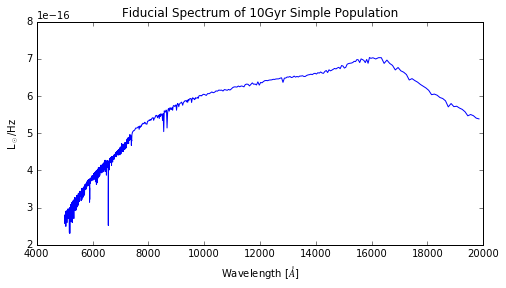

In [6]:
sp2 = fsps.StellarPopulation(compute_vega_mags=False, sfh=0, zmet=5, dust_type=0, sf_start=3.7)
wave2, spec2 = sp2.get_spectrum(tage=13.7)

i = np.where(5000 <= wave2)[0][0]
ii = np.where (wave2 <= 20000)[0][-1]

fig = plt.figure(figsize=(8,4))
plt.plot(wave2[i:ii], spec2[i:ii])
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(r'L$_\odot$/Hz')
plt.title('Fiducial Spectrum of 10Gyr Simple Population')
plt.show()

Now use different IMFs and see how the spectrum changes.

In [7]:
wave2_all = []
spec2_all = []
imf_vals = [0, 2, 3]
for imf in imf_vals:
    sp2.params['imf_type'] = imf
    # get new spectrum
    wave2, spec2 = sp2.get_spectrum(tage=13.7)
    # save this for later plotting
    wave2_all.append(wave2)
    spec2_all.append(spec2)

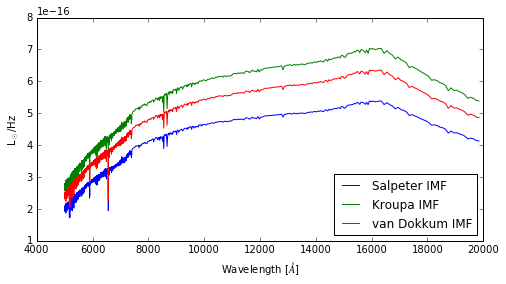

In [8]:
i = np.where(5000 <= wave2_all[0])[0][0]
ii = np.where (wave_all[0] <= 20000)[0][-1]
names = ['Salpeter', 'Kroupa', 'van Dokkum']
fig = plt.figure(figsize=(8,4))
for j in range(3):
    plt.plot(wave2_all[j][i:ii], spec2_all[j][i:ii], label=r'%s IMF'%names[j])
    plt.legend(loc=4)
    plt.xlabel(r'Wavelength [$\AA$]')
    plt.ylabel(r'L$_\odot$/Hz')
plt.show()